**Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

Лин. взаимосвязь: $ks=a+b\cdot zp$ , где

$b=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$

$a=\bar y-b\cdot\bar x=\bar{ks}-b\cdot\bar{zp}$


In [5]:
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
print(f'b = {b}')

a=np.mean(ks)-b*np.mean(zp)
print(f'a = {a}')

ks_lin = a + b * zp
print(f'ks_lin = {ks_lin}')


b = 2.620538882402765
a = 444.1773573243596
ks_lin = [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


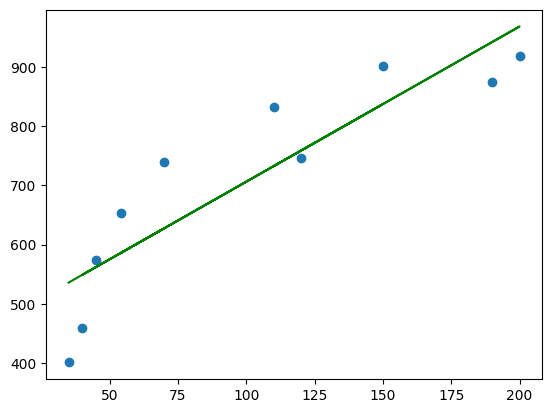

In [12]:
plt.scatter(zp, ks)
plt.plot(zp, ks_lin, 'g')

Решение без intercept:

$\begin{pmatrix}y_1\\y_2\\\dots\\y_n\end{pmatrix}=\begin{pmatrix}x_1\\x_2\\\dots\\x_n\end{pmatrix}\cdot\begin{pmatrix}B\end{pmatrix}$



$\hat B=\left(X^{T}\cdot X\right)^{-1}\cdot X^{T}\cdot Y$



In [10]:
zp1 = zp.reshape(1, 10)
ks1 = ks.reshape(1, 10)
B = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
print(f'B = {B}')

B = 5.889820420132689


In [14]:
ks_lin2 = B * zp
print(f'ks_lin2 = {ks_lin2}')

ks_lin2 = [ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


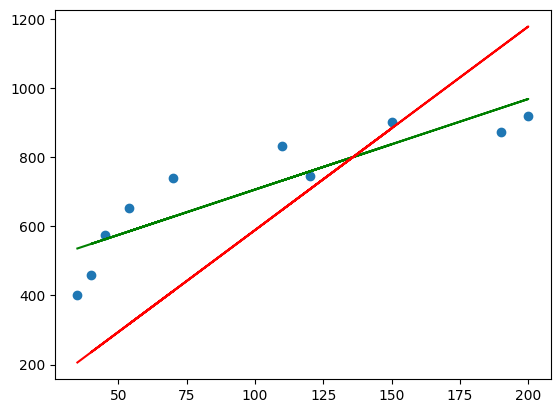

In [32]:
plt.scatter(zp, ks)
plt.plot(zp, ks_lin, 'g')
plt.plot(zp, ks_lin2, 'r')

**Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [33]:
alpha = 1e-6
B1 = 0.1

def mse_(B1, y=ks, X=zp, n=10):
    return np.sum((B1 * X - y) ** 2) / n

for i in range(1000):
    m = (1 / n) * np.sum(2 * (B1 * zp - ks) * zp)
    B1 -= alpha * m
    if i % 100 == 0:
        print(f'Interaction: {i}, B1 : {B1}, mse: {mse_(B1)}')

Interaction: 0, B1 : 0.25952808000000005, mse: 493237.7212546963
Interaction: 100, B1 : 5.54537842245223, mse: 58151.31823171113
Interaction: 200, B1 : 5.868748638669329, mse: 56522.97550129376
Interaction: 300, B1 : 5.888531320728348, mse: 56516.88130936019
Interaction: 400, B1 : 5.8897415574471985, mse: 56516.85850140053
Interaction: 500, B1 : 5.889815595583751, mse: 56516.858416040064
Interaction: 600, B1 : 5.889820124983314, mse: 56516.85841572062
Interaction: 700, B1 : 5.889820402076462, mse: 56516.85841571941
Interaction: 800, B1 : 5.88982041902807, mse: 56516.8584157194
Interaction: 900, B1 : 5.889820420065112, mse: 56516.85841571941
